##### Components of time Series: Trend, Seasonality, Cyclic Component, Irregular Variation, ETS Decompositions

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.columns=['Year_Month','No_of_passengers']
df.head()

,Year_Month,No_of_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


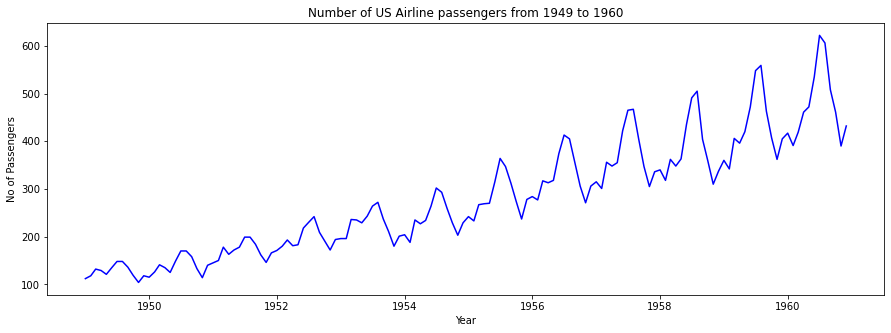

In [126]:
plt.figure(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('No of Passengers')
plt.title('Number of US Airline passengers from 1949 to 1960')
plt.plot(pd.to_datetime(df['Year_Month']),df['No_of_passengers'],c='blue');


##### Additive time Series value= Base level+Trend+Seasonality+Error
##### Multiplicative ....       value=Base level x Trend x Seasonality x Error
If we use Log transformation on data then additive is equivalent to Multiplicative decomposition of original data

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [8]:
###Additive Decomposition
decomposition=seasonal_decompose(df['No_of_passengers'],model='additive',period=12);

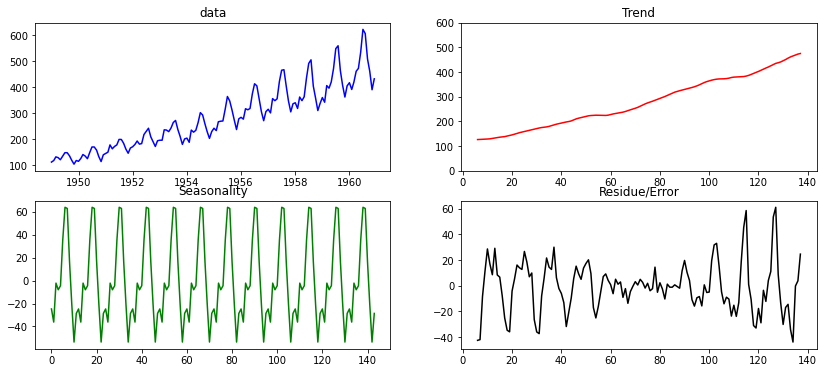

In [9]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

ax1.plot(pd.to_datetime(df['Year_Month']),df['No_of_passengers'],c='blue')
ax1.set_title('data')

ax2.plot(decomposition.trend,c='red')
ax2.set_title('Trend')
ax2.set_ylim(0,600)

ax3.plot(decomposition.seasonal,c='green')
ax3.set_title('Seasonality')

ax4.plot(decomposition.resid,c='black')
ax4.set_title('Residue/Error')
plot_objects;

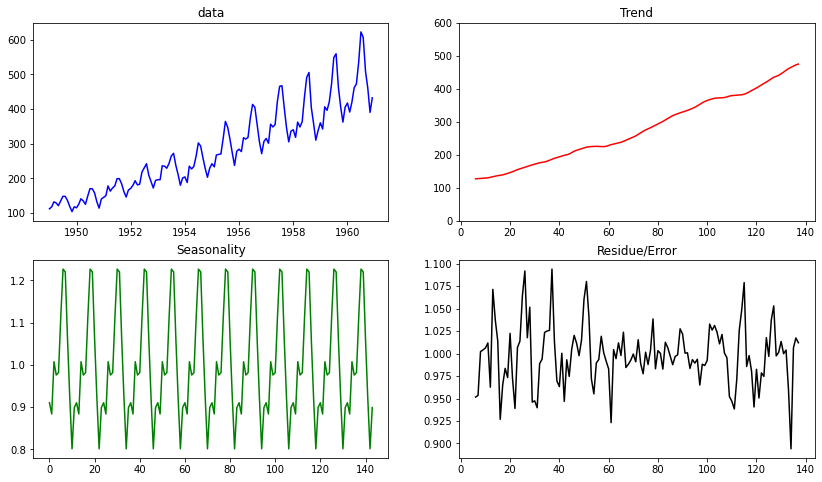

In [45]:
### Multiplicative Decomposition
decomposition=seasonal_decompose(df['No_of_passengers'],model='multiplicative',period=12)
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

ax1.plot(pd.to_datetime(df['Year_Month']),df['No_of_passengers'],c='blue')
ax1.set_title('data')

ax2.plot(decomposition.trend,c='red')
ax2.set_title('Trend')
ax2.set_ylim(0,600)

ax3.plot(decomposition.seasonal,c='green')
ax3.set_title('Seasonality')

ax4.plot(decomposition.resid,c='black')
ax4.set_title('Residue/Error')
plot_objects;

Seasonally adjusted Data

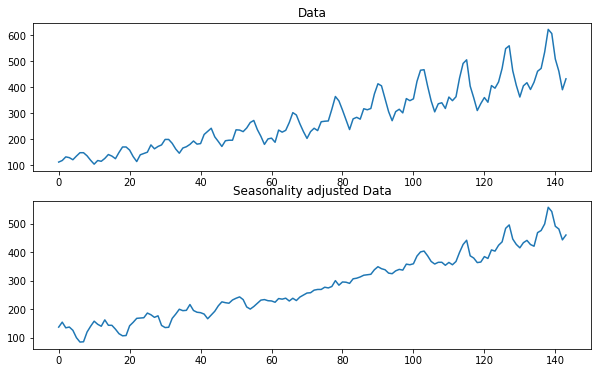

In [26]:
decomposition=seasonal_decompose(df['No_of_passengers'],model='additive',period=12)
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,6))
ax1.plot(decomposition.observed)
ax2.plot(decomposition.observed-decomposition.seasonal)
ax1.set_title('Data')
ax2.set_title('Seasonality adjusted Data');


##### Moving Average Smoothing 
Estimate of Trend Cycle at time t is obtained by averaging values of time series within k periods of t. For order m moving average , m=2k+1(to make it symmetric).

In [11]:
def mas(data,m):
    if len(data)>m:
        k=int(m/2)
        x=[]
        data_ma=[]
        if (m%2!=0):
            for i in range(0,len(data)-m):
                s=sum(data[i:i+m])
                data_ma.append(s/m)
                x.append(i+k)
            return x,data_ma
        else:
            for i in range(0,len(data)-m):
                s=sum(data[i:i+m])
                data_ma.append(s/m)
                x.append(i+k-1)
            return x,data_ma
            

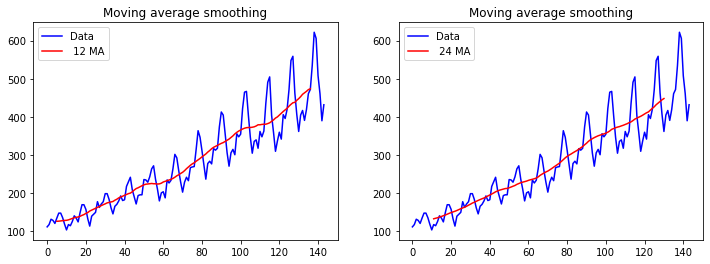

In [12]:
## Since we are observing roughly a 12 month seasonality lets do a moving average of order 12 , 24.. 
data=df['No_of_passengers'].values;
# data=decomposition.trend
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
x,y=mas(data,12)
ax1.plot(data,c='blue',label='Data')
ax1.plot(x,y,c='red',label=' 12 MA')
ax1.legend()
ax1.set_title('Moving average smoothing');

x,y=mas(data,24)
ax2.plot(data,c='blue',label='Data')
ax2.plot(x,y,c='red',label=' 24 MA')
ax2.legend()
ax2.set_title('Moving average smoothing');

To make even order moving average symmetric we can apply moving averagr on moving average. That will be equiivalent to applying odd MA with weights i.e weighted moving average.

The process of CLASSICAL decomposition(additive for e.g) involves  calculating the moving average. The series becomes detrended by by subtracting the MA. Sesonal component of each season is the simply the average values of detrended series values for that season. The seasonal values are adjusted to make sure they add to zero. The reminder component is calculated by substracting seasonal and trend cycle component.  

Draw Backs: The average is not availbale for start and end periods. Seasonal Values may not be constant every year. Not robust to unusual values.

In [85]:
##  STL

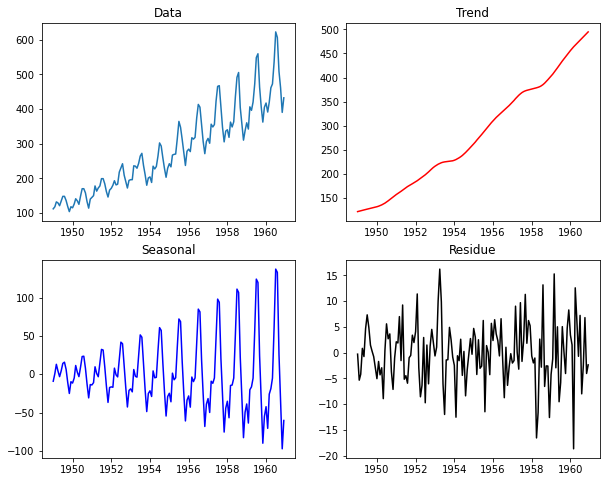

In [86]:
from statsmodels.tsa.seasonal import STL

data1=pd.Series(df['No_of_passengers'].values,index=pd.to_datetime(df['Year_Month']))
stl = STL(data1, seasonal=13)
res = stl.fit()
fig,axs = plt.subplots(2,2,figsize=(10,8))
axs[0,0].plot(res.observed)
axs[0,0].set_title('Data')
axs[0,1].plot(res.trend,c='r')
axs[0,1].set_title('Trend')
axs[1,0].plot(res.seasonal,c='b')
axs[1,0].set_title('Seasonal')
axs[1,1].plot(res.resid,c='k')
axs[1,1].set_title('Residue');


To forecast a decomposed time series, we can forecast seasonal component and the seasonally adjusted component separately. To forecast the seasonally adjusted component any nono seasonal forecasting method may be used like non-seasonal ARIMA, Holt's Method(exponential smoothing) etc. If the seasonality is changing slowly then we can employ seasonal naive method.

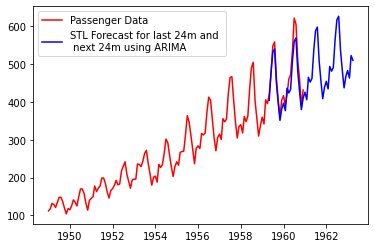

In [137]:
##Using ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
data1.index.freq=data1.index.inferred_freq
stlf = STLForecast(data1.iloc[0:124],ARIMA, model_kwargs=dict(order=(1, 1, 0),trend='t'),period=12);
stlf_res = stlf.fit();

forecast = stlf_res.forecast(48);
plt.plot(data1,c='r',label='Passenger Data');
plt.plot(forecast,c='b',label='STL Forecast for last 24m and \n next 24m using ARIMA');
plt.legend();

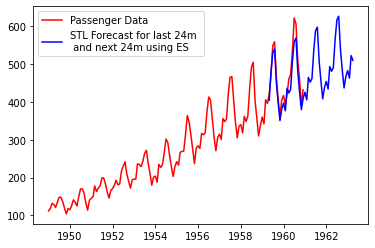

In [148]:
## Using Exponential Smoothing

from statsmodels.tsa.statespace import exponential_smoothing
ES = exponential_smoothing.ExponentialSmoothing
config = {"trend": True,}
stlf = STLForecast(data1.iloc[0:124], ES, model_kwargs=config,period=12)
res = stlf.fit()
forecasts = res.forecast(48)
plt.plot(data1,c='r',label='Passenger Data');
plt.plot(forecasts,c='b',label='STL Forecast for last 24m \n and next 24m using ES');
plt.legend();

Exponential Smoothing(ES):
Forecasts done using ES are average of past observations with weights decaying exponetially as observation gets older.

-Simple Exponetial smoothing for data with no clear trend and seasonality  
-Holt's Method to forecast series with trend  
-Holt-Winter's method to capture seasonality

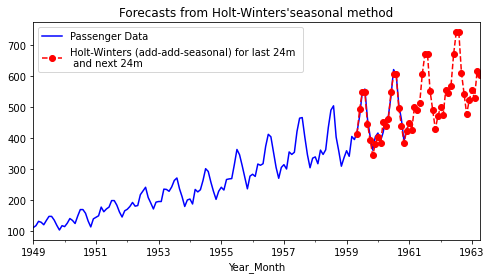

In [145]:
## Holt-Winter's Seasonal method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(
    data1.iloc[0:124],
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

ax = data1.plot(
    figsize=(8, 4),
    color="blue",
    title="Forecasts from Holt-Winters'seasonal method",
    label='Passenger Data',
    legend=True
)

fit1.forecast(48).rename("Holt-Winters (add-add-seasonal) for last 24m \n and next 24m").plot(
    ax=ax, style="--",marker='o', color="red", legend=True
)

plt.show()